### 소션 네트워크 광고
- 특정 연력의 사람이 제품을 구매하는지 여부을 알기
- 캐글 데이터

https://www.kaggle.com/d4rklucif3r/social-network-ads

### 데이터 분석
- 이 모델에 사용된 Dataset은 특정 소득이 있는 특정 연령의 사람이 제품을 구매하는지 여부를 알려줌
- User ID : 유저 아이디
- Gender : 성별
  - 0 : 여자
  - 1 : 남자
- Age : 나이
- EstimatedSalary : 예상 급여
- Purchased : 아이템 구매 여부
  - 0 : 구매 안 함 
  - 1 : 구매 함

### 데이터 준비
데이터 불러오기

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("./Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


사이킷런 Lable Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 라벨 fit
le.fit(df['Gender'])

# 변환
label_encoded = le.transform(df['Gender'])
label_encoded

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [5]:
# Gender 라벨 바꾸기
df2 = pd.DataFrame(label_encoded, columns=['Gender'])
df['Gender'] = df2
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


input(x), target(y) 데이터 설정

In [6]:
# iinput
input = df[['Gender','Age','EstimatedSalary']].to_numpy()

# target
target = df['Purchased'].to_numpy()

input, target

(array([[    1,    19, 19000],
        [    1,    35, 20000],
        [    0,    26, 43000],
        ...,
        [    0,    50, 20000],
        [    1,    36, 33000],
        [    0,    49, 36000]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,

train, test 데이터 분리

In [7]:
# 사이킷런 train_test_split 사용
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
  input, target, stratify=target, random_state=42 
)

### 데이터 시각화 및 전처리
분리한 데이터로 그래프 시각화

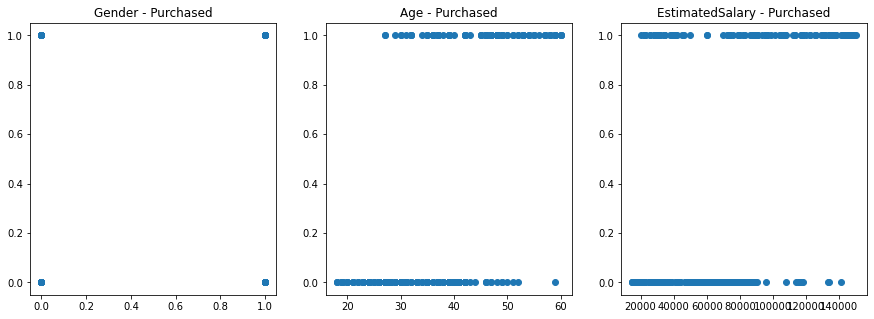

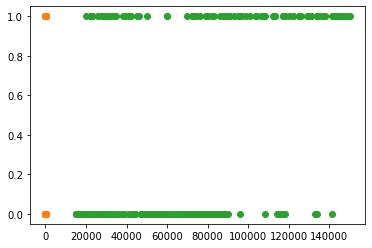

In [8]:
import matplotlib.pyplot as plt
# 요인 따로 그리기
fig, axs = plt.subplots(1, 3,figsize=(15,5))
axs[0].scatter(train_input[:,0], train_target)
axs[0].set_title("Gender - Purchased")
axs[1].scatter(train_input[:,1], train_target)
axs[1].set_title("Age - Purchased")
axs[2].scatter(train_input[:,2], train_target)
axs[2].set_title("EstimatedSalary - Purchased")
plt.show()

# 요인 한번에 그리기
plt.scatter(train_input[:,0], train_target)
plt.scatter(train_input[:,1], train_target)
plt.scatter(train_input[:,2], train_target)
# 보면 스케일때문에 다른의 요인이 쭈그리가됨 -> 스케일 작업 필요
# 성별이 문자열로 들어가있기 때문에 -> 라벨인코딩 

사이킷런 standsacler로 스케일하기

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 학습
ss.fit(train_input)
# 변환
train_scaled = ss.transform(train_input)
# 나중에 머신러닝 score 위해 미리 변환
test_scaled = ss.transform(test_input)

train_scaled, test_scaled


(array([[-0.92295821,  0.45809581,  0.54309037],
        [ 1.08347268,  0.17532062,  0.71372445],
        [-0.92295821, -0.57874655,  1.33938275],
        [-0.92295821, -0.57874655, -1.04949441],
        [ 1.08347268,  0.83512939,  0.23026122],
        [-0.92295821, -1.23855533,  0.51465135],
        [-0.92295821, -1.61558892, -1.36232356],
        [-0.92295821, -0.01319618,  2.13567514],
        [ 1.08347268, -0.76726335, -0.28164103],
        [-0.92295821,  2.06048855,  0.48621234],
        [ 1.08347268,  2.15474694, -0.8219823 ],
        [-0.92295821, -0.20171297,  0.0027491 ],
        [-0.92295821,  1.30642138,  2.13567514],
        [ 1.08347268, -1.61558892,  0.42933431],
        [ 1.08347268,  0.17532062, -0.8219823 ],
        [-0.92295821, -0.10745457,  1.56689487],
        [ 1.08347268, -0.76726335,  2.19255317],
        [ 1.08347268,  0.08106222, -0.56603117],
        [-0.92295821,  1.49493817,  0.31557826],
        [ 1.08347268, -1.05003854, -1.16325046],
        [ 1.08347268

스케일링 된 데이터로 시각화

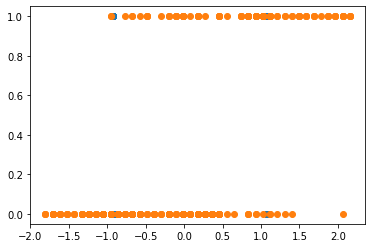

In [10]:
plt.scatter(train_scaled[:,0], train_target)
plt.scatter(train_scaled[:,1], train_target)
plt.scatter(train_scaled[:,2], train_target)
plt.show()
# 잘 섞인걸 볼 수 있음

그렇다면 이제 넘파이로 함수를 생성하여 Zscore 만들기

In [11]:
# 함수 생성
def zscore(x):
  mean = np.mean(x, axis = 0)
  std = np.std(x, axis = 0)

  # axis = 0은 행 1은 열
  # 평균 mean
  # 편자 std
  mean, std

  # 표준점수 ZScore 구하기 
  zscore = (x - mean) / std
  return zscore

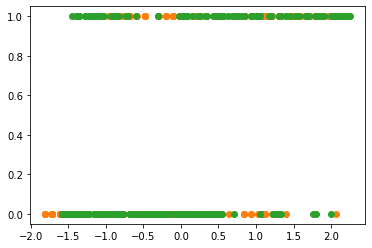

In [16]:
# train 변환
train_z = zscore(train_input)

#test 변환 - 나중에 머신러닝 score 위해 미리 변환
test_z = zscore(test_input)

# 변환된 데이터로 시각화
plt.scatter(train_z[:,0], train_target)
plt.scatter(train_z[:,1], train_target)
plt.scatter(train_z[:,2], train_target)
plt.show()

# 스케일링 잘 됨
# stand 쓴거랑 같음

### 머신러닝 모델 KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 생성
# 기본 이웃수 5
# kn = KNeighborsClassifier(n_neighbors=300) #이러면 0.6
kn = KNeighborsClassifier()

# KNN 모델 학습
kn.fit(train_scaled, train_target)

# 점수 확인
kn.score(test_input, test_target)
# 점수는 0.36인데 애초에 그래프를 보면 관련이 없어보임

0.36

<AxesSubplot:>

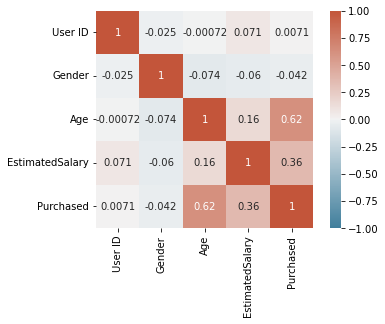

In [31]:
# 점수가 왜일렇게 형편 없는지 이유 알기
# 관련이 없나? corr 해보기
corr = df.corr()
corr
# 관련이 없다 하지만 일단 진행하기
# 그나마 괜찮은건 age?정도..


# 간지나게 시본으로 corr하기
import seaborn as sns
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, vmin=-1,vmax=1, center=0, square=True,) 

# age정도..

In [51]:
# 특정 값 예측하기
x_test = np.array([[0,22, 80000]])

# 특정값 스케일 해주기
x_scaler = ss.transform(x_test)
print("특정값 스케일값", x_scaler)

# 예측
print("여자이면서(0) 22살 예상급여가 80000만원 구매여부", kn.predict(x_scaler))

특정값 스케일값 [[-0.92295821 -1.42707212  0.25870023]]
여자이면서(0) 22살 예상급여가 80000만원 구매여부 [0]
